In [113]:
#change folder name at folder_path in the beginning and output_file_path in the end of the block each time
import os
import glob
import pandas as pd
import pyopenms as oms

# Folder path containing the mzXML files
folder_path = "C:/Users/shubh/Downloads/Class_H_H/"

# List to store the subset dataframes
subset_dfs = []

# Iterate over files in the folder
for file_path in glob.glob(folder_path + "*.mzXML"):
    file_name = os.path.basename(file_path)
    print(file_name)
    options = oms.PeakFileOptions()
    options.setMSLevels([1])
    fh = oms.MzXMLFile()
    fh.setOptions(options)

    # Load data
    input_map = oms.MSExperiment()
    fh.load(file_path, input_map)
    input_map.updateRanges()

    ff = oms.FeatureFinder()
    ff.setLogType(oms.LogType.CMD)

    # Run the feature finder
    name = "centroided"
    features = oms.FeatureMap()
    seeds = oms.FeatureMap()
    params = oms.FeatureFinder().getParameters(name)
    ff.run(name, input_map, features, params, seeds)

    features.setUniqueIds()
    fh = oms.FeatureXMLFile()
    fh.store(file_path+".featureXML", features)
    print("Found", features.size(), "features")

    subset_df = features.get_df()
    subset_df.to_csv(file_path+".csv", index=True)




PT09_20080507MvD02.mzXML
Found 42857 features
PT22_20080520MvD02.mzXML
Found 41602 features
PT28_20080520MvD14.mzXML
Found 40358 features
PT37_20080520MvD32.mzXML
Found 38906 features
PT39_20080520MvD36.mzXML
Found 36387 features
PT_DUPLO6_20080619MvD20.mzXML
Found 74970 features


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import os
import glob


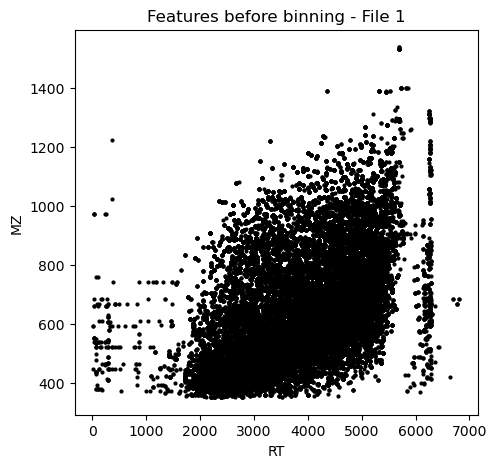

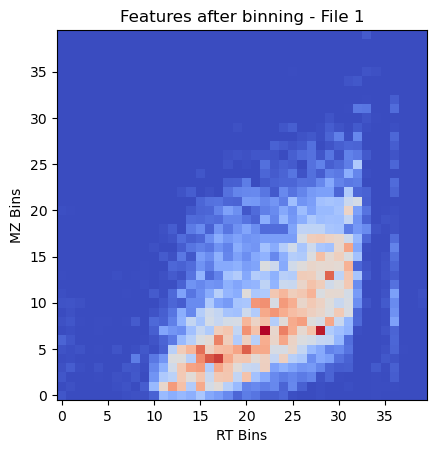

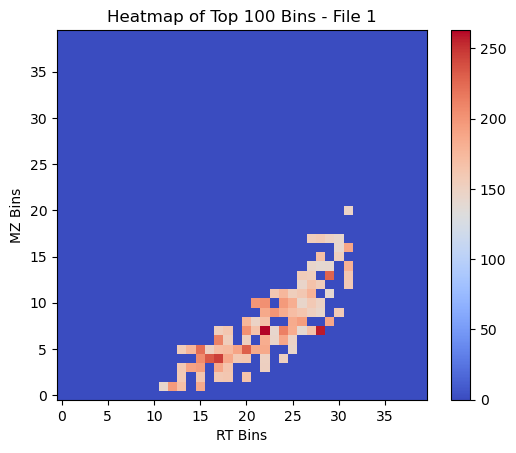

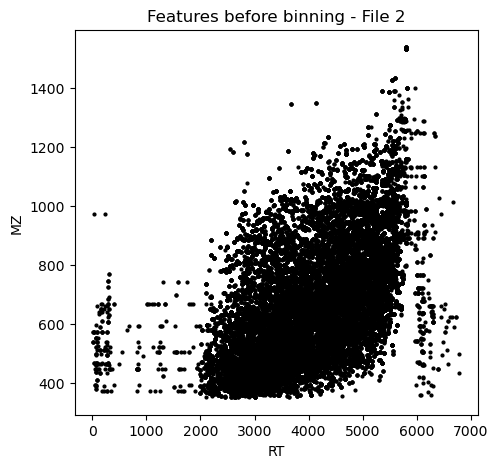

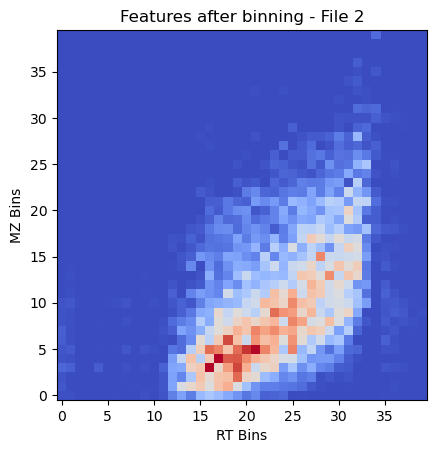

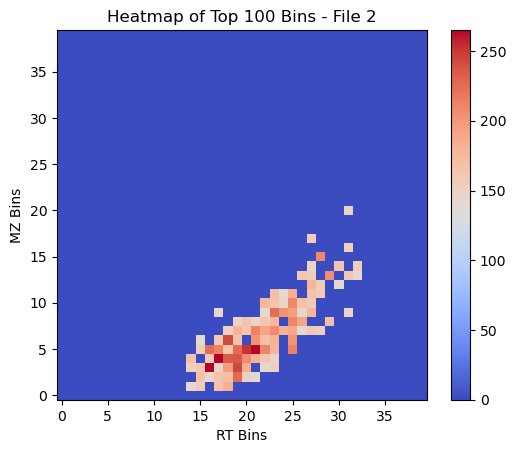

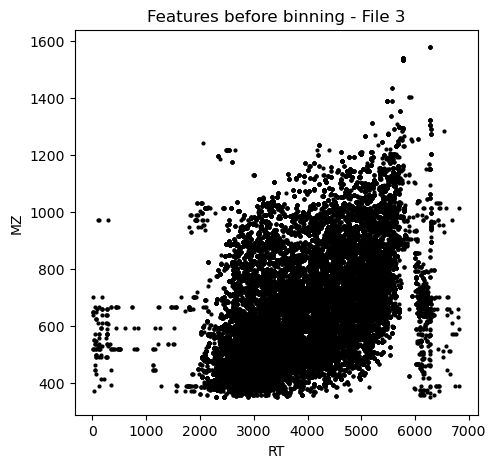

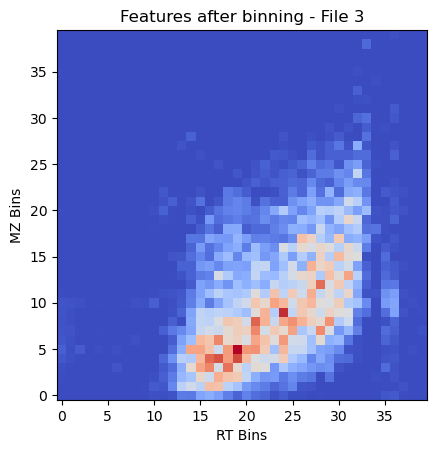

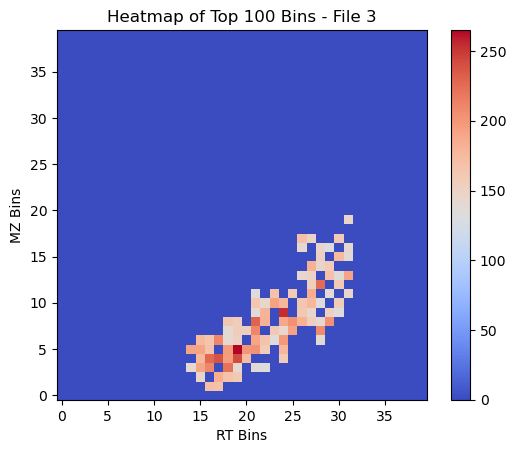

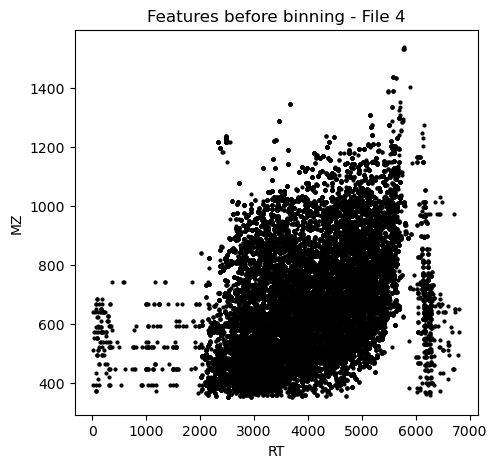

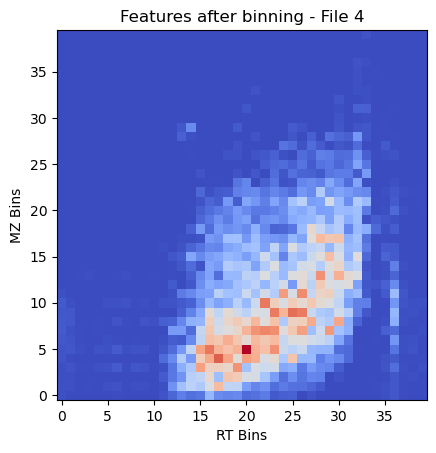

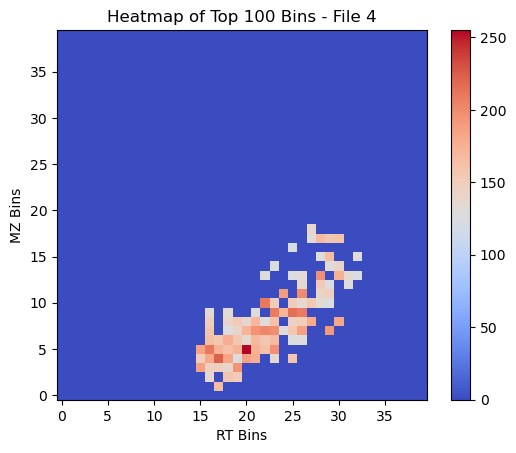

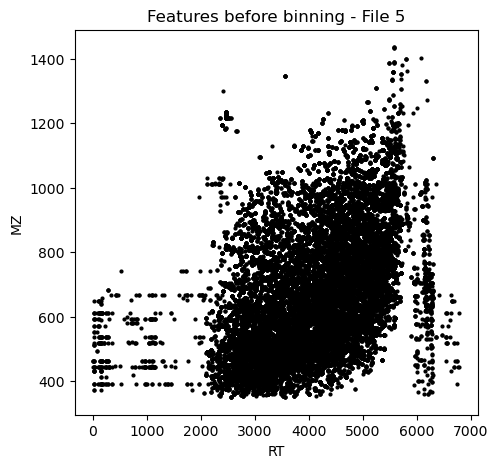

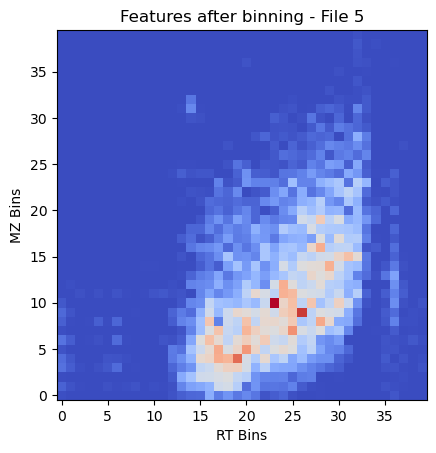

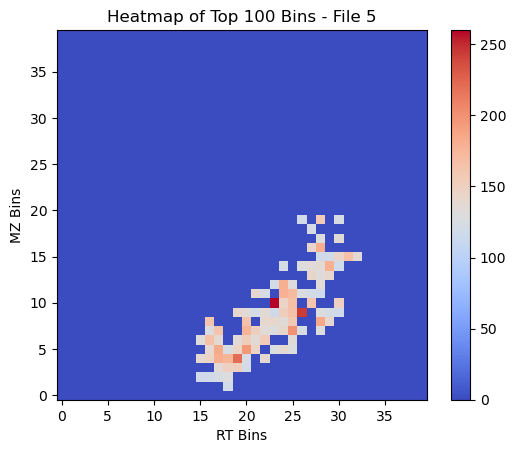

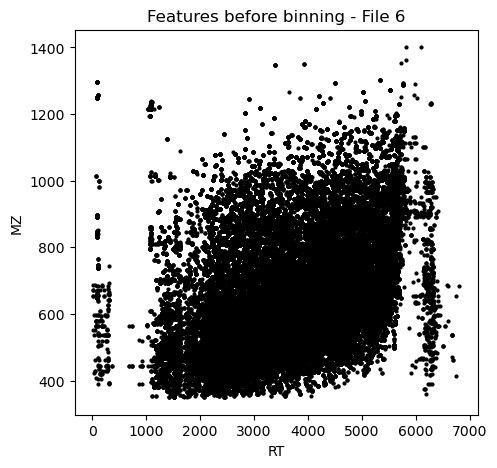

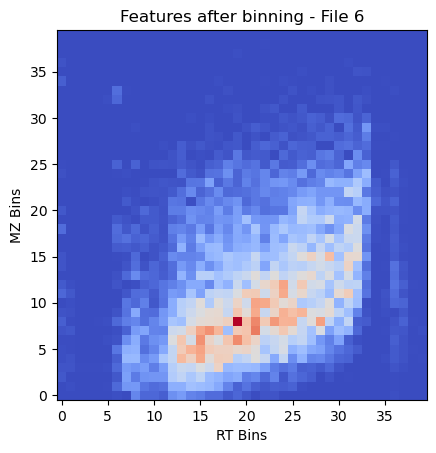

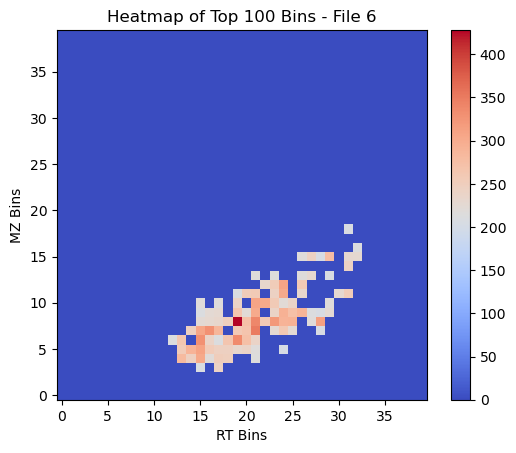

In [3]:

folder_path = "C:/Users/shubh/Downloads/Class_H_H/"
i = 1
imp_data_pts =[]

for file_path in glob.glob(folder_path + "*.csv"):
    plt.figure(figsize=(5.2, 5))
    features_H_H = pd.read_csv(file_path)
    RT = features_H_H['RT']
    MZ = features_H_H['mz']
    plt.scatter(RT, MZ, s=4, c='black')
    plt.xlabel('RT')
    plt.ylabel('MZ')
    plt.title(f'Features before binning - File {i}')
    plt.show()

    min_RT = min(RT)
    max_RT = max(RT)
    min_MZ = min(MZ)
    max_MZ = max(MZ)

    RT_nbins = 40
    MZ_nbins = 40
    RT_binsize = (max_RT - min_RT) / RT_nbins
    MZ_binsize = (max_MZ - min_MZ) / MZ_nbins

    rt_ind = np.floor((RT - min_RT) / RT_binsize).astype(int)
    mz_ind = np.floor((MZ - min_MZ) / MZ_binsize).astype(int)

    histogram_2d, _, _ = np.histogram2d(rt_ind, mz_ind, bins=(RT_nbins, MZ_nbins))

    plt.imshow(histogram_2d.T, cmap='coolwarm', origin='lower')  
    plt.xlabel('RT Bins')
    plt.ylabel('MZ Bins')
    plt.title(f'Features after binning - File {i}')
    plt.show()
    
    # Find the indices of the top 30 bins based on count
    top_indices = np.argsort(-histogram_2d, axis=None)[:100]

    # Convert the flat indices to 2D indices
    top_indices_2d = np.unravel_index(top_indices, histogram_2d.shape)

    # Create a mask for the top bins
    top_bins_mask = np.zeros_like(histogram_2d, dtype=bool)
    top_bins_mask[top_indices_2d] = True

    # Apply the mask to retain only the top bins in the heatmap
    heatmap_data = np.where(top_bins_mask, histogram_2d, 0)

    plt.imshow(heatmap_data.T, cmap='coolwarm', origin='lower')
    plt.colorbar()
    plt.title(f'Heatmap of Top 100 Bins - File {i}')
    plt.xlabel('RT Bins')
    plt.ylabel('MZ Bins')
    plt.show()

    top_data_points = []
    for rt_bin, mz_bin in zip(top_indices_2d[0], top_indices_2d[1]):
        mask = (rt_ind == rt_bin) & (mz_ind == mz_bin)
        data_points = np.column_stack((RT[mask], MZ[mask]))
        top_data_points.append(data_points)
    
    imp_data_pts.append(np.concatenate(top_data_points))
    i = i+1
    


In [4]:
len(imp_data_pts)

6

In [5]:
import numpy as np

for i in range(len(imp_data_pts)):
    imp_data_pts[i][:, 0] = np.round(imp_data_pts[i][:, 0], 2).astype(float)


In [6]:
average_dfs = []

for data_pts in imp_data_pts:
    file_2 = pd.DataFrame(imp_data_pts[1])

    df = pd.DataFrame(data_pts)
    averaged_df = df.groupby(0)[1].mean()
    average_dfs.append(averaged_df)

In [7]:
average_dfs

[0
 1883.31    397.847656
 1901.18    395.701202
 1901.97    395.702148
 1902.97    395.703095
 1909.25    382.855438
               ...    
 5454.31    776.384578
 5454.33    776.380977
 5454.35    776.362667
 5454.47    832.731990
 5454.67    777.382324
 Name: 1, Length: 15902, dtype: float64,
 0
 2387.29    448.752106
 2387.38    448.753326
 2387.43    448.754547
 2387.46    462.726898
 2388.67    484.262695
               ...    
 5605.38    764.386165
 5605.39    751.737361
 5605.64    759.403133
 5605.74    764.389705
 5605.82    751.740779
 Name: 1, Length: 16379, dtype: float64,
 0
 2397.66    528.270691
 2397.79    528.284241
 2401.88    521.278564
 2407.27    521.305756
 2407.56    443.748962
               ...    
 5460.68    698.390137
 5460.72    934.018762
 5460.80    698.387146
 5460.81    869.968384
 5461.02    934.013452
 Name: 1, Length: 15814, dtype: float64,
 0
 2564.64    514.291260
 2564.68    514.278442
 2564.70    514.294495
 2564.76    514.289673
 2564.82    51

In [8]:
flattened_array=[]
flattened_array.append([arr.flatten() for arr in imp_data_pts])
print(flattened_array)

[[array([3768.22     ,  584.8540649, 3768.21     , ...,  690.3475952,
       5097.95     ,  690.3101196]), array([2797.31      ,  442.95367432, 2797.26      , ...,  433.23059082,
       3665.47      ,  439.23794556]), array([3337.14      ,  510.24609375, 3337.4       , ...,  868.44695602,
       5044.27      ,  869.94085693]), array([3452.69      ,  510.24609375, 3453.04      , ...,  739.71239792,
       5489.77      ,  748.85626221]), array([3935.49      ,  638.85223389, 3935.5       , ...,  779.84259033,
       4785.25      ,  775.3560791 ]), array([3311.81      ,  571.82202148, 3311.78      , ...,  764.92205811,
       4869.8       ,  744.90136719])]]


In [9]:
min_length = min(len(arr) for arr in flattened_array[0])
#print(min_length)
subset_arrays = [arr[:min_length] for arr in flattened_array[0]]

print(subset_arrays)

[array([3768.22     ,  584.8540649, 3768.21     , ...,  649.8845215,
       4877.81     ,  670.3479614]), array([2797.31      ,  442.95367432, 2797.26      , ...,  459.71316528,
       2483.75      ,  452.23574829]), array([3337.14      ,  510.24609375, 3337.4       , ...,  544.32220459,
       3172.22      ,  560.78479004]), array([3452.69      ,  510.24609375, 3453.04      , ...,  564.2711792 ,
       3096.69      ,  565.92492676]), array([3935.49      ,  638.85223389, 3935.5       , ...,  779.84259033,
       4785.25      ,  775.3560791 ]), array([3311.81      ,  571.82202148, 3311.78      , ...,  740.42461715,
       5280.11      ,  721.90899658])]


In [10]:
df = pd.DataFrame(subset_arrays)
print(df)
df.to_csv(folder_path+"1.csv", index=True)


     0           1        2           3        4           5        6      \
0  3768.22  584.854065  3768.21  584.851990  3783.72  567.654785  3783.83   
1  2797.31  442.953674  2797.26  442.954834  2733.69  449.747192  2797.18   
2  3337.14  510.246094  3337.40  510.244507  3336.79  510.247681  3337.44   
3  3452.69  510.246094  3453.04  510.244507  3452.23  510.247681  3453.32   
4  3935.49  638.852234  3935.50  638.849792  3949.11  638.852234  3935.49   
5  3311.81  571.822021  3311.78  571.820068  3311.84  571.824036  3311.75   

        7        8           9      ...    28982       28983    28984  \
0  567.656738  3787.56  558.326965  ...  4924.00  661.065930  4942.70   
1  442.956024  2733.66  449.748413  ...  2488.96  466.746918  2470.45   
2  510.242950  3327.19  517.256042  ...  3217.13  560.291870  3141.03   
3  510.242950  3494.95  517.254456  ...  3130.47  584.957703  3235.32   
4  638.854736  3949.16  638.854736  ...  4872.73  769.404846  4767.49   
5  571.818115  3383.20

In [11]:
len(flattened_array[0][1])

35538

In [12]:
len(flattened_array[0][2])

34030

In [13]:
len(flattened_array[0][3])

31884

In [14]:
len(flattened_array[0][4])

28992

In [15]:
len(flattened_array[0][5])

50578

In [16]:
import numpy as np

flattened_array = [arr.flatten() for arr in imp_data_pts]

# Convert flattened_array to a 2D numpy array
flattened_array = np.array(flattened_array)


C:\Users\shubh\AppData\Local\Temp\ipykernel_7600\64078352.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  flattened_array = np.array(flattened_array)


In [17]:
flattened_array[0]

array([3768.22     ,  584.8540649, 3768.21     , ...,  690.3475952,
       5097.95     ,  690.3101196])